In [33]:
import pandas as pd
import re
df = pd.read_csv("/Users/guanlizhe/Desktop/nccu/NLP/body_shaming/main_code/all_label.csv", index_col=[0],low_memory=False)

In [34]:
df = df[df["label"].astype(str).str.contains(pat = "1", regex=True,na=False)]

In [35]:
female = []
for comment in df['content']:
    comment = str(comment)
    found = re.findall('肥婆|台女|扁奶|沒奶|胖妹|大媽|阿姨|阿桑|阿罵|婆媽|歐巴桑|龍妹|/?9妹|處女|嬯|破麻|陰道|鮑|陰唇|貞操|婊|妓女', comment)
    if len(found) > 0:
        female.append('female')
    else:
        female.append('other')
df['female'] = female
df[['content','female']]

,content,female
0,樓上的 是因為腰粗所以走不藍尼路線嗎,other
1,"她很胖~""~",other
3,垃圾死肥豬,other
4,聽說他很胖 在日本減肥成功,other
5,胖子=豬... 好慘= =,other
...,...,...
7218,種天生甜不辣手還是保持乾淨就好…不要,other
7219,建立抄襲就畢不了業的制度啦幹 死胖子,other
7220,死肥豬什麼時候會得愛滋死掉,other
7222,樓下體脂高又醜又肥,other


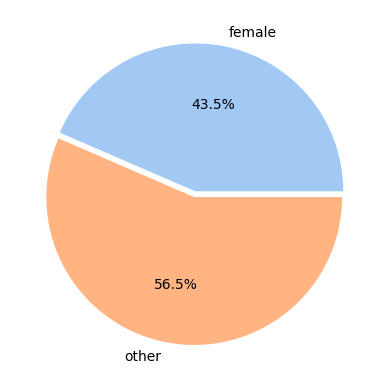

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
df_girl = df[df["female"].str.contains(pat = "female", regex=True,na=False)]
df_other = df[df["female"].str.contains(pat = "other", regex=True,na=False)]
 
data = [len(df_girl),len(df_other)]
labels=['female', 'other']
explode = [0.02,0.02]
colors = sns.color_palette('pastel')

plt.pie(data, labels=labels, colors = colors,autopct = '%1.1f%%',explode = explode)
plt.show()